In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go


In [3]:
import scipy
from scipy.stats import skew
from scipy.stats import kurtosis
import pylab as p
import statsmodels.api as sm


In [4]:
df=pd.read_csv("Advertising.csv")
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [7]:
rows,columns = df.shape
print(f'There are {rows} rows and {columns} columns in a dataset')

There are 200 rows and 5 columns in a dataset


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [9]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [11]:
print('skewness')
print('TV')
print(round(skew(df.TV,axis=0, bias=True),4))
print('Radio')
print(round(skew(df.Radio,axis=0, bias=True),4))
print('Newspaper')
print(round(skew(df.Newspaper,axis=0, bias=True),4))
print('Sales')
print(round(skew(df.Sales,axis=0, bias=True),4))


skewness
TV
-0.0693
Radio
0.0935
Newspaper
0.888
Sales
0.4045


In [12]:
print('kurtosis')
print('TV')
print(round(kurtosis(df.TV,axis=0, bias=True),4))
print('Radio')
print(round(kurtosis(df.Radio,axis=0, bias=True),4))
print('Newspaper')
print(round(kurtosis(df.Newspaper,axis=0, bias=True),4))
print('Sales')
print(round(kurtosis(df.Sales,axis=0, bias=True),4))

kurtosis
TV
-1.2259
Radio
-1.259
Newspaper
0.6035
Sales
-0.4286


In [13]:
df.isnull().sum()*100/df.shape[0]

Unnamed: 0    0.0
TV            0.0
Radio         0.0
Newspaper     0.0
Sales         0.0
dtype: float64

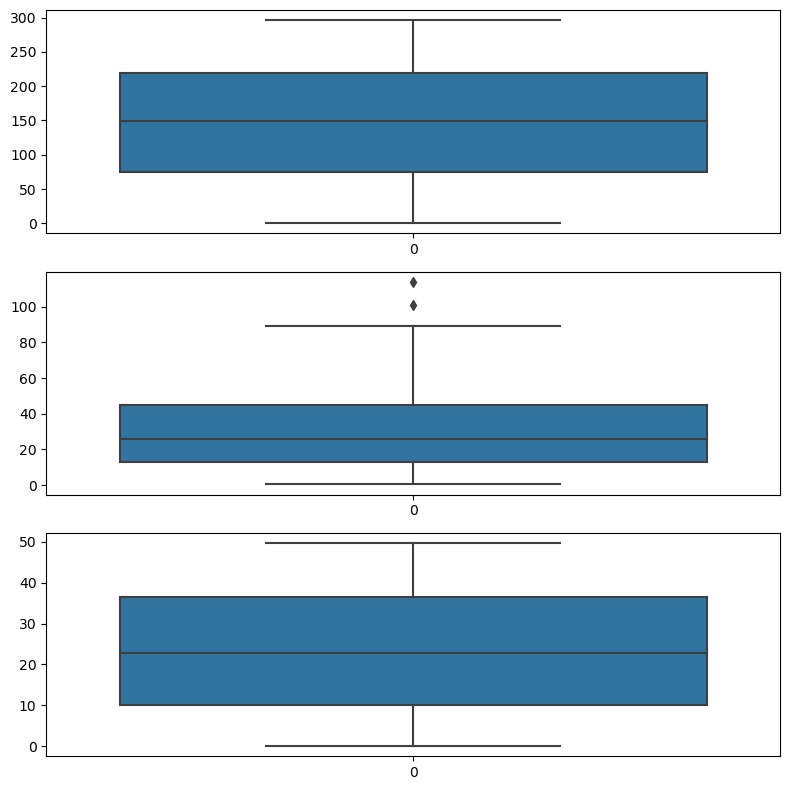

In [21]:
fig, axs = plt.subplots( 3, figsize = (8,8))
plt1 = sns.boxplot(df['TV'],ax=axs[0])
plt2 = sns.boxplot(df['Newspaper'],ax=axs[1])
plt3 = sns.boxplot(df['Radio'],ax=axs[2])
plt.tight_layout()

<function matplotlib.pyplot.show(close=None, block=None)>

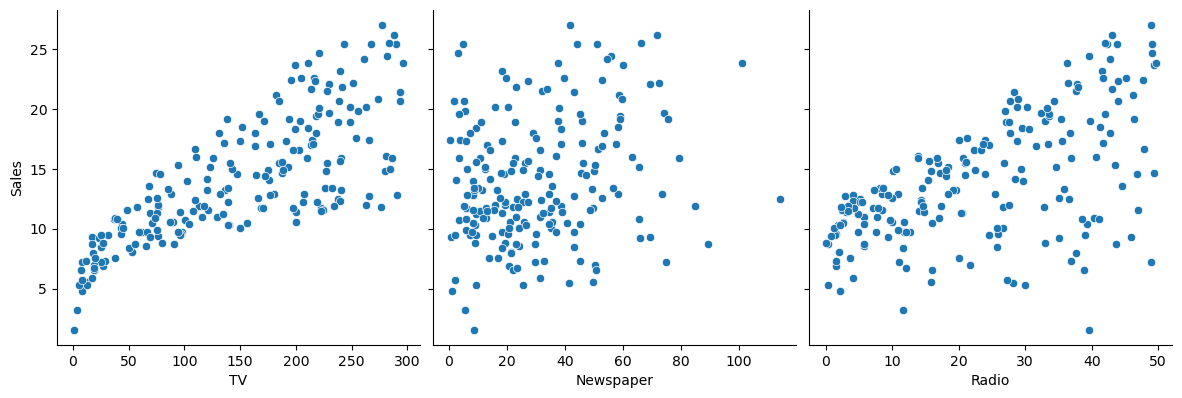

In [29]:
sns.pairplot(df,x_vars=['TV','Newspaper','Radio'],y_vars='Sales',height=4,aspect=1,kind='scatter')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

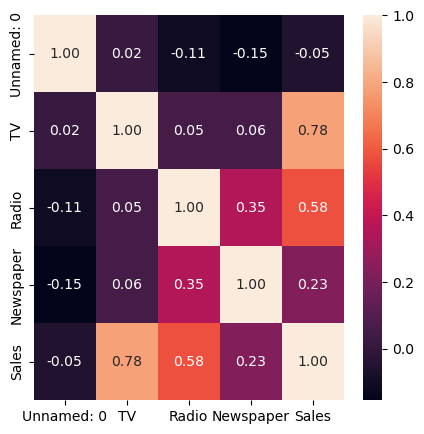

In [30]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(),annot = True,fmt ='.2f')
plt.show

In [32]:
x=df['TV']
y=df['Sales']

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.5,test_size = 0.3,random_state=150)


In [35]:
x_train.head()

2       17.2
197    177.0
32      97.2
164    117.2
19     147.3
Name: TV, dtype: float64

In [36]:
y_train.head()

2       9.3
197    12.8
32      9.6
164    11.9
19     14.6
Name: Sales, dtype: float64

In [44]:
x_train_sm = sm.add_constant(x_train)
lr = sm.OLS(y_train,x_train_sm).fit()

In [45]:
lr.params

const    7.375734
TV       0.045016
dtype: float64

In [46]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     137.2
Date:                Fri, 13 Oct 2023   Prob (F-statistic):           2.43e-20
Time:                        09:52:36   Log-Likelihood:                -255.39
No. Observations:                 100   AIC:                             514.8
Df Residuals:                      98   BIC:                             520.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.3757      0.627     11.763      0.0

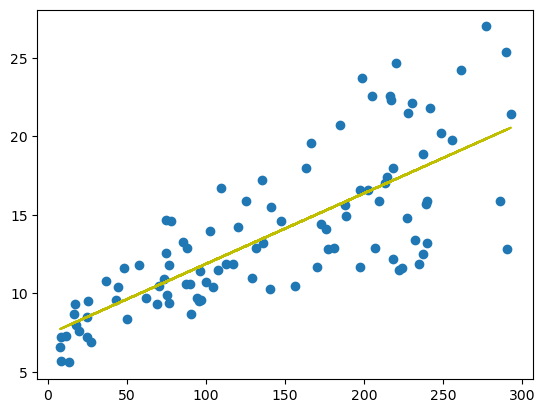

In [51]:
plt.scatter(x_train,y_train)
plt.plot(x_train,7.375+0.045*x_train,'y')